Importing the necessary libarires:

In [482]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt
import plotly.express as px

Accessing the CSV from our GitHub repository:

In [483]:
house_data_frame = pd.read_csv("https://raw.githubusercontent.com/xBuki/CS4661/main/HouseRentMisc/House_Rent_Dataset.csv")

Displaying the first few rows of data:

In [484]:
house_data_frame.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


Displaying more rows of data along with how many rows and columns:

In [485]:
print(house_data_frame)

       Posted On  BHK   Rent  Size            Floor    Area Type  \
0     2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1     2022-05-13    2  20000   800       1 out of 3   Super Area   
2     2022-05-16    2  17000  1000       1 out of 3   Super Area   
3     2022-07-04    2  10000   800       1 out of 2   Super Area   
4     2022-05-09    2   7500   850       1 out of 2  Carpet Area   
...          ...  ...    ...   ...              ...          ...   
4741  2022-05-18    2  15000  1000       3 out of 5  Carpet Area   
4742  2022-05-15    3  29000  2000       1 out of 4   Super Area   
4743  2022-07-10    3  35000  1750       3 out of 5  Carpet Area   
4744  2022-07-06    3  45000  1500     23 out of 34  Carpet Area   
4745  2022-05-04    2  15000  1000       4 out of 5  Carpet Area   

                 Area Locality       City Furnishing Status  Tenant Preferred  \
0                       Bandel    Kolkata       Unfurnished  Bachelors/Family   
1     Phool Bagan, Ka

Here we are checking if there are any null or empty values in any column:

In [486]:
house_data_frame.isna().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

All respective columns have their information stored as indicated.

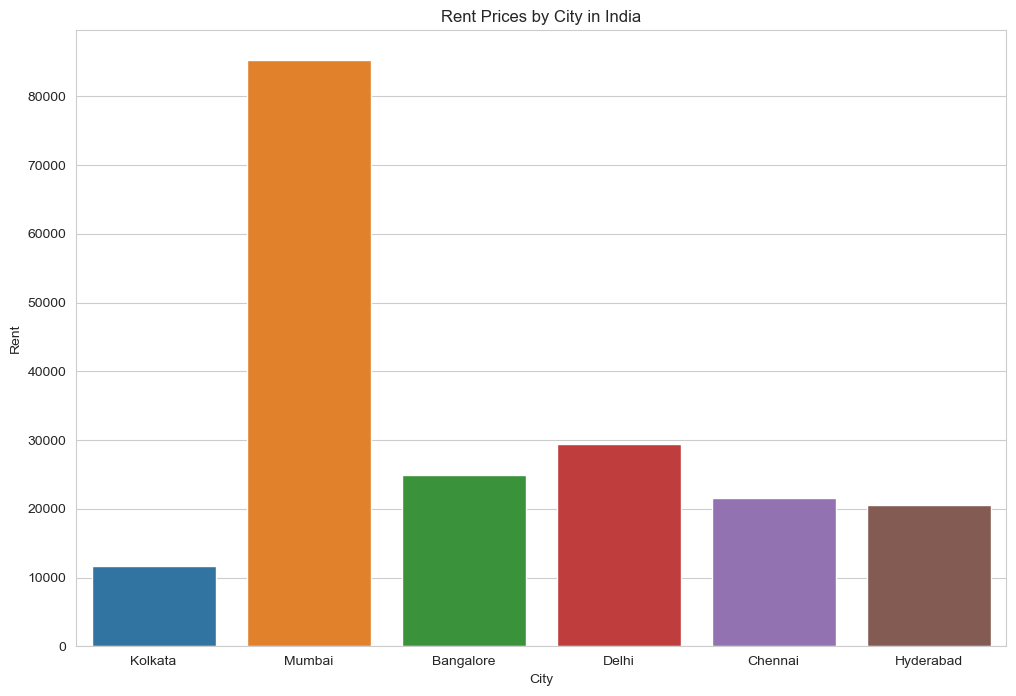

In [487]:
# Creating graph plot to visualize the rent prices between cities.
plt.figure(figsize=(12,8))
sns.barplot(x='City', y='Rent', data=house_data_frame, errorbar=None) 
# Adding labels to the X and Y planes.
plt.xlabel('City')
plt.ylabel('Rent')
# Adding the graph plot title.
plt.title('Rent Prices by City in India')
# Showing the plot.
plt.show()

Additional Home Information:

Size of House/Flat/Apartment:

In [488]:
fig = px.histogram(house_data_frame, x="Size", title='Size of Homes')
fig.show()

Area Types / Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area:

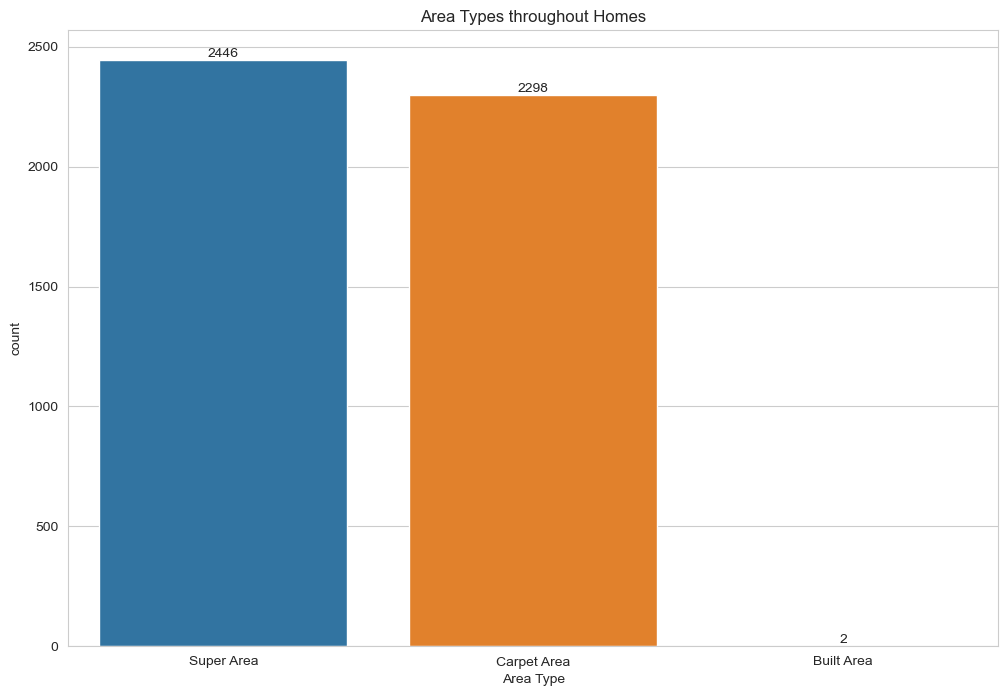

In [489]:
fig, axes = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x='Area Type', data=house_data_frame)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Area Types throughout Homes')
plt.show()

Houses available for rent in different cities:

In [490]:
house_data_frame['City'].value_counts()

City
Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: count, dtype: int64

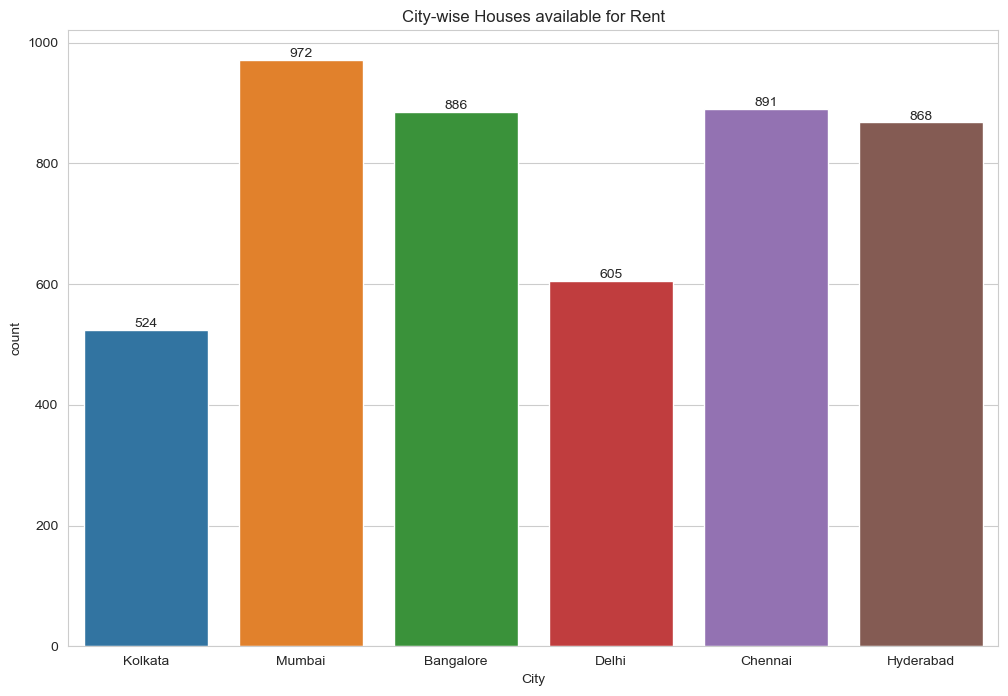

In [491]:
fig, axes = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x='City', data=house_data_frame)
for container in ax.containers:
    ax.bar_label(container)
plt.title('City-wise Houses available for Rent')
plt.show()

Furnishing Status:

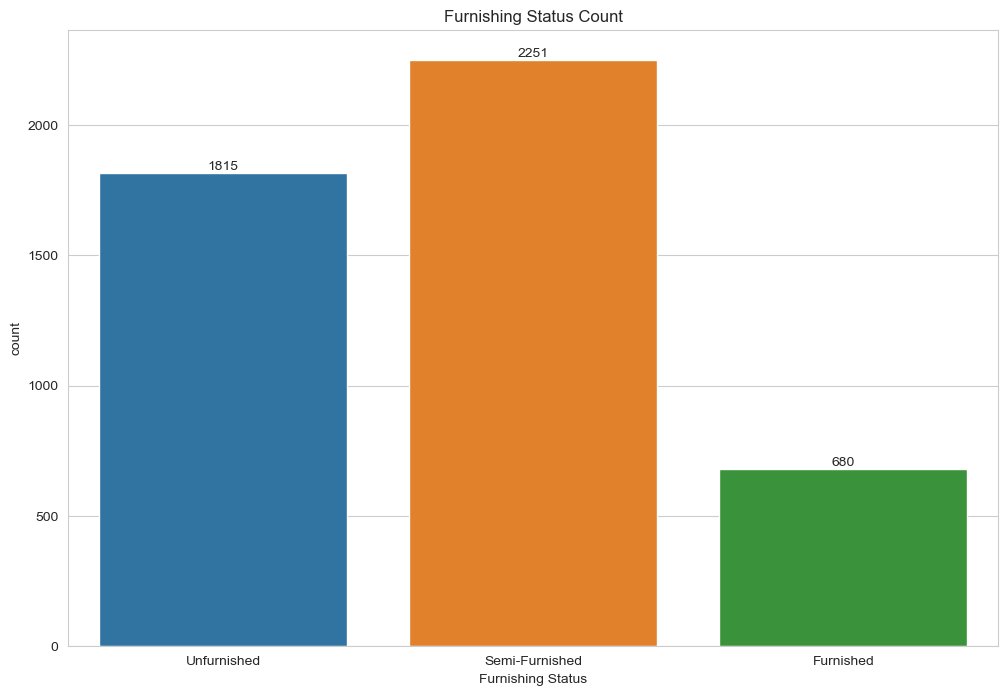

In [492]:
fig, axes = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x='Furnishing Status', data=house_data_frame)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Furnishing Status Count')
plt.show()

Tenants Types

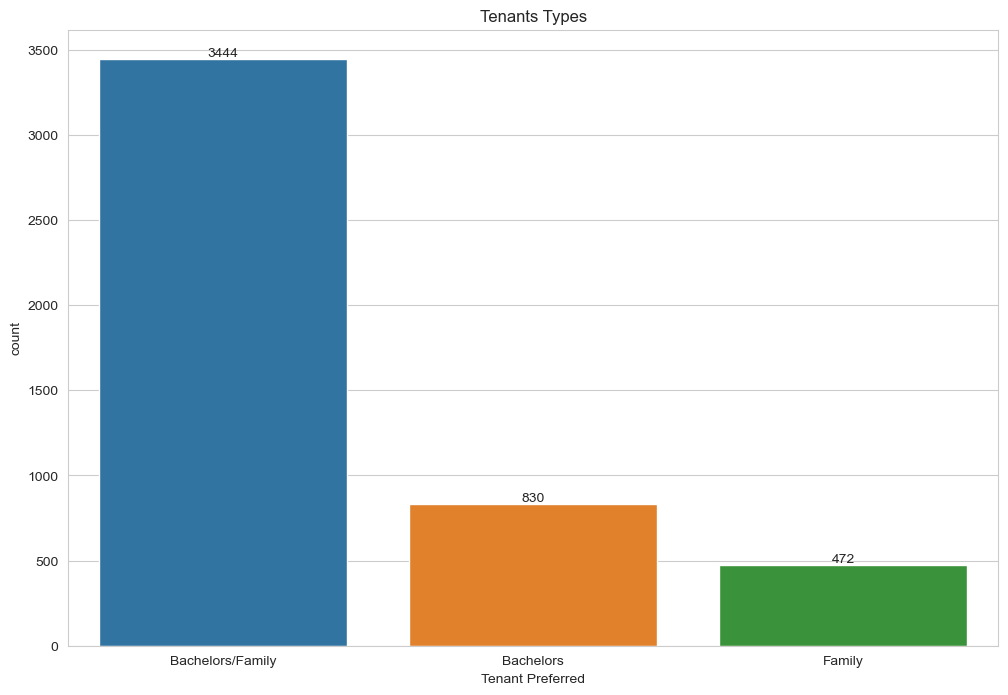

In [493]:
fig, axes = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x='Tenant Preferred', data=house_data_frame)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Tenants Types')
plt.show()

Rooms and Bahtrooms


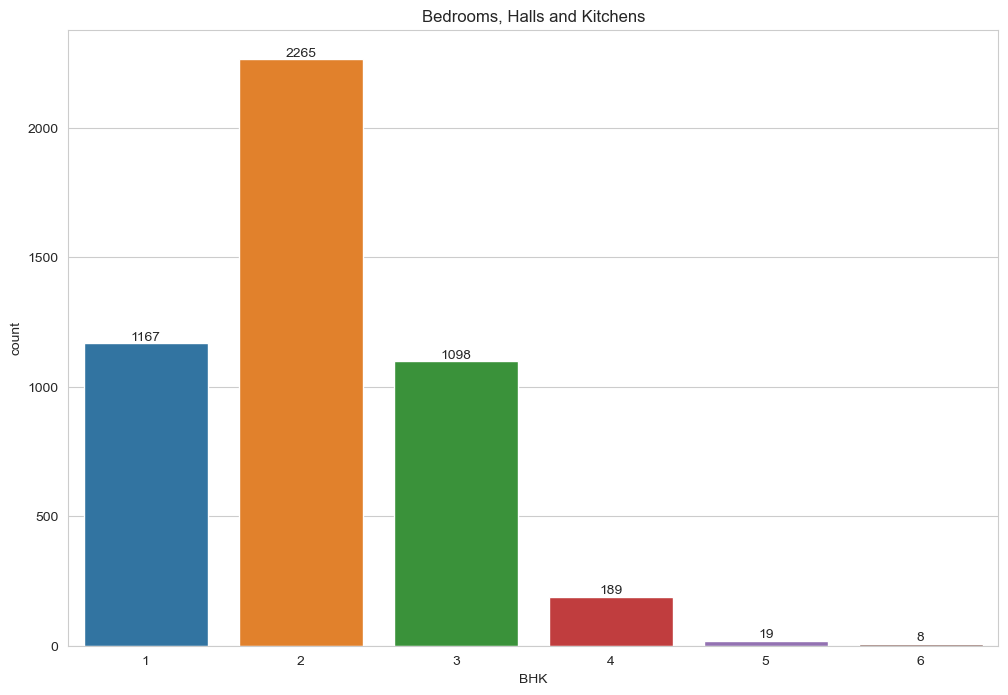

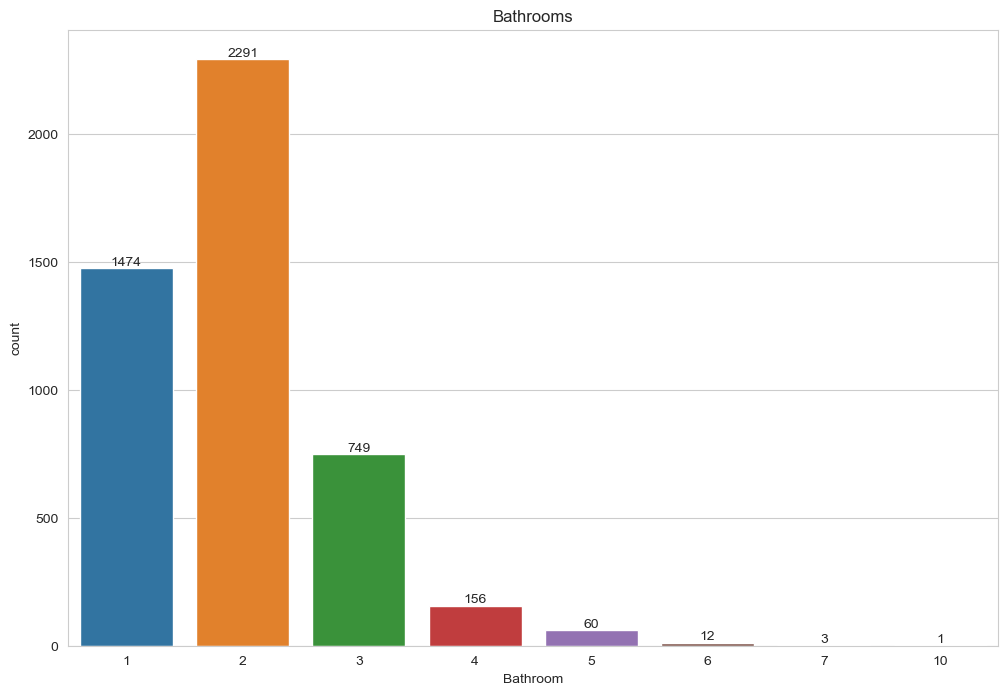

In [494]:
fig, axes = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x='BHK', data=house_data_frame)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Bedrooms, Halls and Kitchens')
plt.show()
fig, axes = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x='Bathroom', data=house_data_frame)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Bathrooms')
plt.show()

Dropping Columns as they are not necessary:

In [495]:
columns_to_drop = ['Posted On', 'Point of Contact', 'Area Locality', 'Floor']
house_data_frame = house_data_frame.drop(columns_to_drop, axis=1)

# We dropped:
# Posted On: Irelevant information
# Point of Contact: We deemed this irelevant as we are focusing on the homes itself with their respective values.
# Area Locality: We are going based off the cities rather than the towns.
# Floor: N/A
house_data_frame.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1


Label Encoding:

In [496]:
# Columns to be label encoded
columns_to_label_encode = ['Area Type', 'City', 'Tenant Preferred', 'Furnishing Status']

# Dictionary to store label encoders for each column
label_encoders = {}

# Apply label encoding using a for loop
for column in columns_to_label_encode:
    le = LabelEncoder()
    house_data_frame[column] = le.fit_transform(house_data_frame[column])
    label_encoders[column] = le

# Apply one-hot encoding (get_dummies)
house_data_frame = pd.get_dummies(house_data_frame, columns=columns_to_label_encode)

# Convert True and False to 1 and 0
house_data_frame = house_data_frame.astype(int)

house_data_frame.head()

,BHK,Rent,Size,Bathroom,Area Type_0,Area Type_1,Area Type_2,City_0,City_1,City_2,City_3,City_4,City_5,Tenant Preferred_0,Tenant Preferred_1,Tenant Preferred_2,Furnishing Status_0,Furnishing Status_1,Furnishing Status_2
0,2,10000,1100,2,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
1,2,20000,800,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0
2,2,17000,1000,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0
3,2,10000,800,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,2,7500,850,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1


Splitting Up and Setting Train and Test Data:

In [497]:
X = house_data_frame.drop('Rent', axis=1)
y = house_data_frame['Rent']

In [498]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

In [499]:
# Scaling the data
y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)
print(X_train,y_train)

[[ 1.07242196  0.99751713  0.03208951 ...  2.47254734 -0.95294218
  -0.78871434]
 [-0.11392028 -0.36341383  0.03208951 ... -0.40444119 -0.95294218
   1.26788616]
 [-1.30026253 -1.05017992 -1.09002997 ... -0.40444119 -0.95294218
   1.26788616]
 ...
 [-0.11392028 -0.26260413  0.03208951 ... -0.40444119  1.04938161
  -0.78871434]
 [ 1.07242196  3.99030514  1.15420899 ... -0.40444119  1.04938161
  -0.78871434]
 [-1.30026253 -0.81390719  0.03208951 ... -0.40444119  1.04938161
  -0.78871434]] [[ 0.34978649]
 [ 0.47937846]
 [-0.34529773]
 ...
 [-0.18036249]
 [ 0.58540826]
 [-0.12145705]]


Linear Regression / Regressor

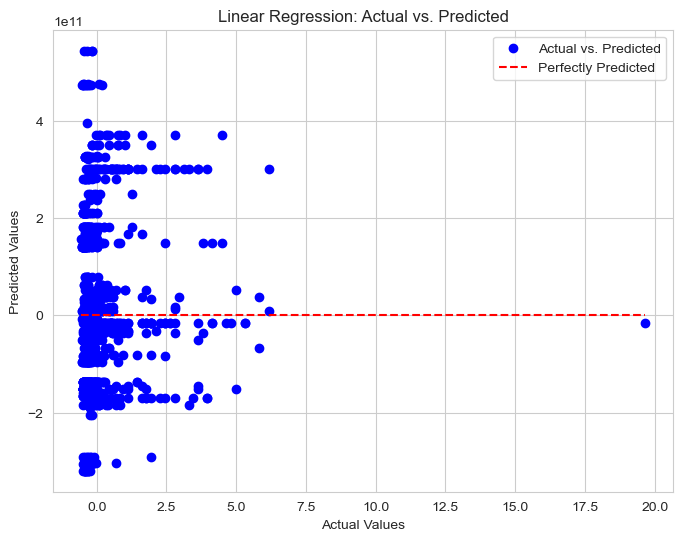

MAE: 122655309556.4375
MSE: 2.544256080596344e+22
RMSE: 159507243741.35315


In [500]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lm_prediction, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfectly Predicted')
plt.title('Linear Regression: Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


lm = LinearRegression()
lm.fit(X_train,y_train)
lm_prediction = lm.predict(X_test)

# Evaluation metrics
mae_lm = metrics.mean_absolute_error(y_test, lm_prediction)
mse_lm =  metrics.mean_squared_error(y_test, lm_prediction)
rmse_lm =  np.sqrt(mse_lm)
print('MAE:', mae_lm)
print('MSE:', mse_lm)
print('RMSE:', rmse_lm)



KNN Regression / Regressor

In [501]:
# KNN REGRESSION
knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(X_train, y_train)

# Predict on the test set
y_test_pred = knn_reg.predict(X_test)

# Evaluation metrics
mae_knn = metrics.mean_absolute_error(y_test, y_test_pred)
mse_knn = metrics.mean_squared_error(y_test, y_test_pred)
rmse_knn = np.sqrt(mse_knn)

# Print or use the evaluation metrics as needed
print("MAE (Mean Absolute Error) for KNN Regression:", mae_knn)
print("MSE (Mean Squared Error) for KNN Regression:", mse_knn)
print("RMSE (Root Mean Squared Error) for KNN Regression:", rmse_knn)

MAE (Mean Absolute Error) for KNN Regression: 0.26857111475494166
MSE (Mean Squared Error) for KNN Regression: 0.5602661421706906
RMSE (Root Mean Squared Error) for KNN Regression: 0.7485092799496147


Decision Tree Regression

In [502]:
dt = DecisionTreeRegressor(random_state = 100)
dt.fit(X_train, y_train)
dt_prediction = dt.predict(X_test)

# Evaluation metrics
mae_dt = metrics.mean_absolute_error(y_test, dt_prediction)
mse_dt =  metrics.mean_squared_error(y_test, dt_prediction)
rmse_dt =  np.sqrt(mse_dt)
print('MAE:', mae_dt)
print('MSE:', mse_dt)
print('RMSE:', rmse_dt)

MAE: 0.30145002363342127
MSE: 1.51486601914122
RMSE: 1.2307989353022775
